In [12]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram
from random import randint

In [169]:
class BernsteinVazirani:
    def __init__(self, units=3):
        self.qubits = units
        self.circuit = QuantumCircuit(units,units-1)
        self.backend = Aer.get_backend("aer_simulator")
    
    def prepare(self, hidden_string=None):
        self.set_superposition()
        self.add_barrier()
        self.add_hidden_string(hidden_string)
        self.add_barrier()
        self.remove_superposition()
        self.add_barrier()
        self.add_measurements()
    
    def add_hidden_string(self, hidden_string):
        if(hidden_string is None):
            hidden_string = format(randint(0, (2**(self.qubits-1))-1), f"0{self.qubits-1}b")[::-1]
        else:
            hidden_string = hidden_string[::-1]

        for qubit, bit in enumerate(hidden_string):
            if(bit == '1'):
                self.circuit.cx(qubit+1, 0)
    
    def set_superposition(self):
        self.circuit.x(0)
        self.circuit.h(range(self.qubits))
    
    def add_barrier(self):
        self.circuit.barrier()
        
    def remove_superposition(self):
        self.circuit.h(range(self.qubits))
        
    def add_measurements(self):
        self.circuit.measure(range(1, self.qubits), range(0, self.qubits-1)) 
    
    def measure(self):
        results = self.backend.run(self.circuit, shots=1000).result().get_counts()
        display(plot_histogram(results))
    
    def show(self):
        display(self.circuit.draw('mpl'))

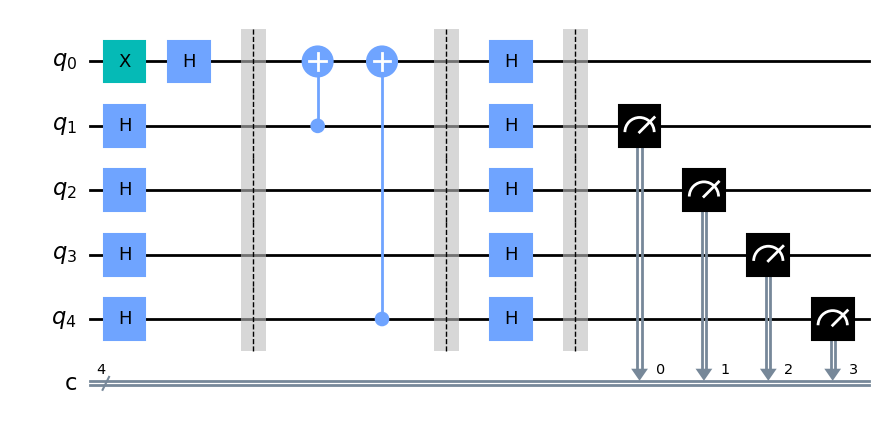

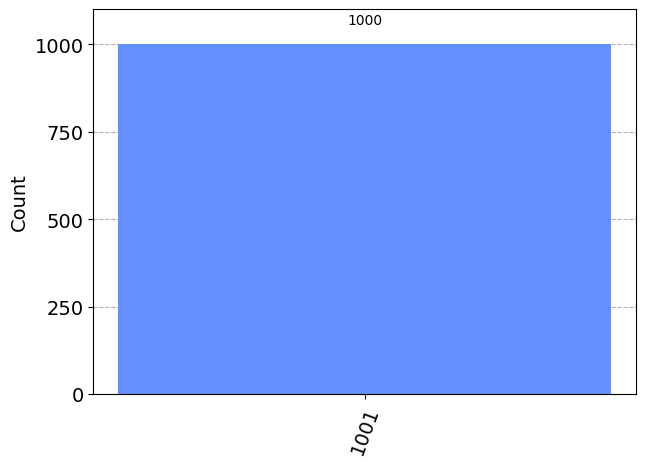

In [171]:
algorithm = BernsteinVazirani(5)
algorithm.prepare()
algorithm.show()
algorithm.measure()